# Initial Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
# import bcolz
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline
data_path = "C:/Users/sp14657/all/"
seed=1204
# def save_array(fname, arr):
#     """
#     save numpy array to file
#     """
#     c=bcolz.carray(arr, rootdir=fname, mode='w')
#     c.flush()

# def load_array(fname):
#     return bcolz.open(fname)[:]

def get_submission(test,item_cnt_month):
    sub = test.copy()
    sub['item_cnt_month'] = item_cnt_month
    sub.drop(['item_id','shop_id'],axis=1,inplace=True)
    sub.to_csv(data_path + 'submission.csv',index=False)
    return sub

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

from itertools import product
from sklearn.preprocessing import LabelEncoder



In [3]:
# from xgboost import XGBRegressor
# from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

import time
import sys
import gc
import pickle

In [4]:
# import xgboost

In [5]:
transactions    = pd.read_csv(os.path.join(data_path, 'sales_train.csv.gz'),index_col=0)
items           = pd.read_csv(os.path.join(data_path, 'items.csv'),index_col=0)
item_categories = pd.read_csv(os.path.join(data_path, 'item_categories.csv'),index_col=0)
shops           = pd.read_csv(os.path.join(data_path, 'shops.csv'),index_col=0)
test            = pd.read_csv(os.path.join(data_path, 'test.csv.gz'),index_col=0)

# Viewing the different datasets

In [6]:
transactions.head()


,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
02.01.2013,0,59,22154,999.00,1.0
03.01.2013,0,25,2552,899.00,1.0
05.01.2013,0,25,2552,899.00,-1.0
06.01.2013,0,25,2554,1709.05,1.0
15.01.2013,0,25,2555,1099.00,1.0


In [7]:
items.head()

,item_id,item_category_id
item_name,,
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
"!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]",1,76
***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_categories.head()

,item_category_id
item_category_name,
PC - Гарнитуры/Наушники,0
Аксессуары - PS2,1
Аксессуары - PS3,2
Аксессуары - PS4,3
Аксессуары - PSP,4


In [9]:
shops.head()

,shop_id
shop_name,
"!Якутск Орджоникидзе, 56 фран",0
"!Якутск ТЦ ""Центральный"" фран",1
"Адыгея ТЦ ""Мега""",2
"Балашиха ТРК ""Октябрь-Киномир""",3
"Волжский ТЦ ""Волга Молл""",4


In [61]:
test.head()

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [49]:
print(transactions.shape)
print(test.shape)

(2935849, 5)
(214200, 2)


In [28]:
transactions['date_format'] = pd.to_datetime(transactions.date,format='%d.%m.%Y')

In [50]:
transactions.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
02.01.2013,0,59,22154,999.00,1.0
03.01.2013,0,25,2552,899.00,1.0
05.01.2013,0,25,2552,899.00,-1.0
06.01.2013,0,25,2554,1709.05,1.0
15.01.2013,0,25,2555,1099.00,1.0


In [31]:
transactions.item_cnt_day.describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

# Distribution of items sold across months

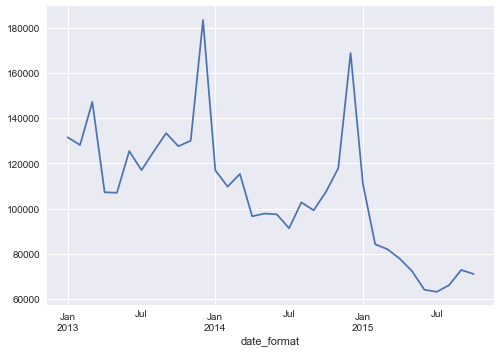

In [33]:
plt.style.use('seaborn')

transactions.copy().set_index('date_format').item_cnt_day.resample('M') \
                            .sum().plot();

# Distribution of mean of items sold across months

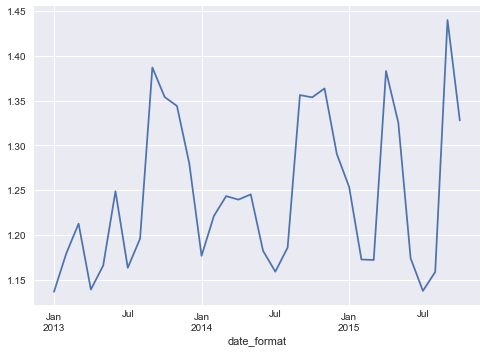

In [35]:
plt.style.use('seaborn')
transactions.copy().set_index('date_format').item_cnt_day.resample('M') \
                            .mean().plot();

# Distribution of items sold & mean items sold across days in a month

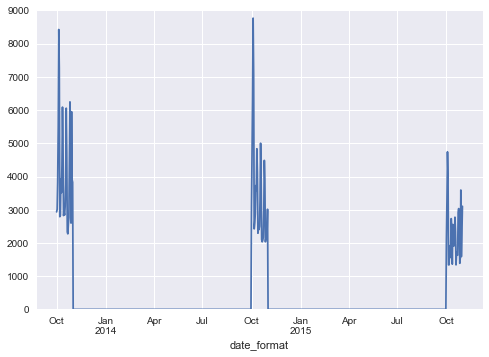

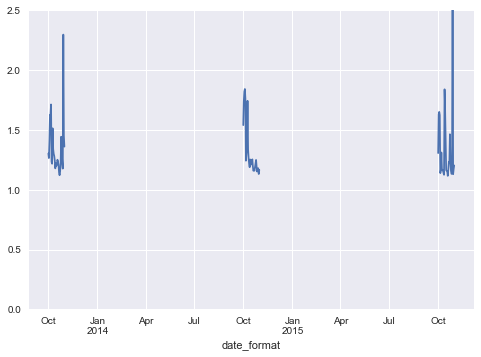

In [37]:
# get oct sales per each day
plt.style.use('seaborn')
transactions[list(map(lambda x: x.month in [10] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
transactions[list(map(lambda x: x.month in [10] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show()

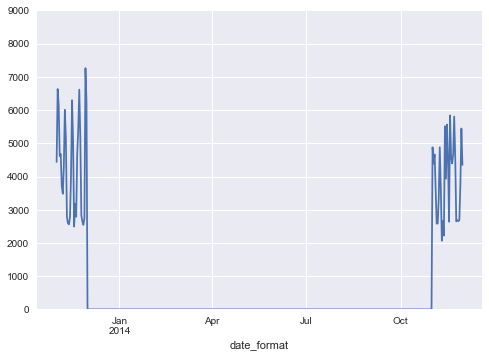

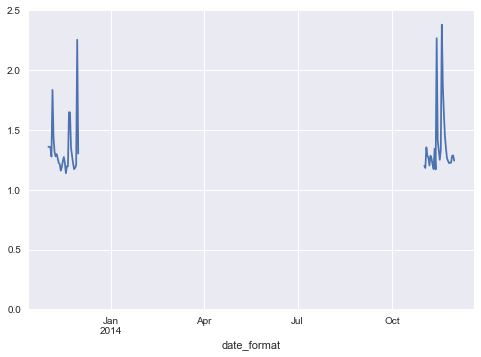

In [39]:
#November
plt.style.use('seaborn')
transactions[list(map(lambda x: x.month in [11] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
transactions[list(map(lambda x: x.month in [11] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show()

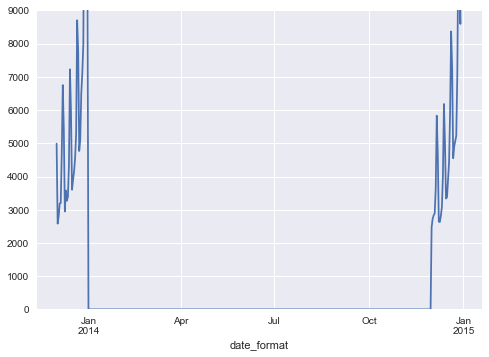

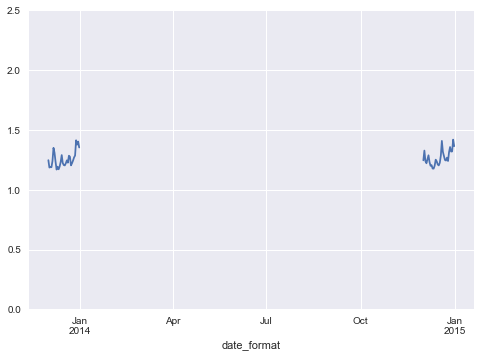

In [40]:
#December
plt.style.use('seaborn')
transactions[list(map(lambda x: x.month in [12] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .sum().plot();
plt.ylim(0, 9000)
plt.show()
transactions[list(map(lambda x: x.month in [12] , transactions.date_format))].set_index('date_format').item_cnt_day.resample('D') \
                            .mean().plot();
plt.ylim(0, 2.5)
plt.show()